In [240]:
#### Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import urllib
from urllib.request import urlopen
import json
import csv
# import simplejson
import pandas as pd
# import pytest
import base64
import sys
import glob
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
from bs4 import BeautifulSoup
import requests
from pprint import pprint
from ohmysportsfeedspy.v1_0 import API_v1_0
from ohmysportsfeedspy.v1_1 import API_v1_1
from ohmysportsfeedspy.v1_2 import API_v1_2
from ohmysportsfeedspy import MySportsFeeds
msf = MySportsFeeds(version="1.2")
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
#Top 5 Teams Bar Chart
overall = "NFL_Standings/Overall/Overall_Standings_Combined.csv"
overall = pd.read_csv(overall)
overall.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)
overall.set_index("Season")
overall.head(8)
#Team Overall Standings/Stats by Season
# overall[["Season", "#Team Abbr."]]
# overall.groupby(x.index).sum()
# team = overall.groupby(["Season","#Team Abbr.", "#Rank", "#Wins", "#Losses"]).sum()
# list(conference.columns.values)
# team
# sptTotals = team[["#KB", "#KrRet", "#KrYds", "#KrAvg", "#KrLng","#KrTD", 
#                         "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 
#                         "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 
#                         "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 
#                         "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",
#                         "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",
#                         "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", "#FgAtt50Plus",
#                         "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", "#XpAtt", 
#                         "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", "#KoYds",
#                         "#KoOOB", '#KoAvg', "#KoTB", "#KoRet", "#KoRetYds", 
#                         "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", "#Punts", 
#                         "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", "#PuntNetAvg", 
#                         "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", "#PuntIn20Pct", 
#                         "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", "#PuntRetYds", "#PuntRetAvg"
# ]]
# sptTotals.head()
# offTotals = overall[["#PassAttempts", "#PassCompletions", "#PassPct", "#PassAttemptsPerGame", 
#                         "#PassGrossYards", "#PassNetYards", "#PassYardsPerAtt", "#PassYardsPerGame", "#PassTD", "#PassTDPct", 
#                         "#PassInt", "#PassIntPct", "#PassLng", "#PassAvg", "#Pass20Plus", 
#                         "#Pass40Plus", "#PassSacks", "#PassSackY", "#QBRating", "#RushAttempts", 
#                         "#RushAttemptsPerGame", "#RushYards", "#RushAverage", "#RushYardsPerGame", "#RushTD", 
#                         "#RushLng", "#Rush1stDowns", "#Rush1stDownsPct", "#Rush20Plus", "#Rush40Plus", 
#                         "#RushFumbles", "#Receptions", "#RecYards", "#RecAverage", 
#                         "#RecYardsPerGame", "#RecTD", "#RecLng", "#Rec1stDowns", "#Rec20Plus", 
#                         "#Rec40Plus", "#RecFumbles"
#                        ]]
# offTotals.head()
# defTotals = team[["#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#SackYds", 
#                         "#TacklesForLoss", "#Interceptions", "#IntTD", "#IntYds", "#IntAverage", 
#                         "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#StuffYds",
#                         "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
#                         "#FumRecYds", "#FumTotalRec", "#FumTD"
# ]]
# defTotals.head()

,Season,#Team ID,#Team Abbr.,#Team City,#Team Name,#Rank,#GamesPlayed,#PassAttempts,#PassCompletions,#PassPct,#PassAttemptsPerGame,#PassGrossYards,#PassNetYards,#PassAvg,#PassYardsPerAtt,#PassYardsPerGame,#PassTD,#PassTDPct,#PassInt,#PassIntPct,#PassLng,#Pass20Plus,#Pass40Plus,#PassSacks,#PassSackY,#QBRating,#RushAttempts,#RushAttemptsPerGame,#RushYards,#RushAverage,#RushYardsPerGame,#RushTD,#RushLng,#Rush1stDowns,#Rush1stDownsPct,#Rush20Plus,#Rush40Plus,#RushFumbles,#Receptions,#RecYards,#RecAverage,#RecYardsPerGame,#RecTD,#RecLng,#Rec1stDowns,#Rec20Plus,#Rec40Plus,#RecFumbles,#TackleSolo,#TackleTotal,#TackleAst,#Sacks,#SackYds,#TacklesForLoss,#Interceptions,#IntTD,#IntYds,#IntAverage,#IntLng,#PassesDefended,#Stuffs,#StuffYds,#KB,#Safeties,#Fumbles,#FumLost,#FumForced,#FumOwnRec,#FumOppRec,#FumRecYds,#FumTotalRec,#FumTD,#KrRet,#KrYds,#KrAvg,#KrLng,#KrTD,#Kr20Plus,#Kr40Plus,#KrFC,#KrFum,#PrRet,#PrYds,#PrAvg,#PrLng,#PrTD,#Pr20Plus,#Pr40Plus,#PrFC,#PrFum,#FgBlk,#FgMade,#FgAtt,#FgPct,#FgMade1_19,#FgAtt1_19,#Fg1_19Pct,#FgMade20_29,#FgAtt20_29,#Fg20_29Pct,#FgMade30_39,#FgAtt30_39,#Fg30_39Pct,#FgMade40_49,#FgAtt40_49,#Fg40_49Pct,#FgMade50Plus,#FgAtt50Plus,#Fg50PlusPct,#FgLng,#XpBlk,#XpMade,#XpAtt,#XpPct,#FgAndXpPts,#KoPct,#Kickoffs,#KoYds,#KoOOB,#KoAvg,#KoTB,#KoRet,#KoRetYds,#KoRetAvgYds,#KoTD,#KoOS,#KoOSR,#Punts,#PuntYds,#PuntNetYds,#PuntLng,#PuntAvg,#PuntNetAvg,#PuntBlk,#PuntOOB,#PuntDown,#PuntIn20,#PuntIn20Pct,#PuntTB,#PuntTBPct,#PuntFC,#PuntRet,#PuntRetYds,#PuntRetAvg,#FirstDownsTotal,#FirstDownsPass,#FirstDownsRush,#FirstDownsPenalty,#ThirdDowns,#ThirdDownsAtt,#ThirdDownsPct,#FourthDowns,#FourthDownsAtt,#FourthDownsPct,#Penalties,#PenaltyYds,#OffensePlays,#OffenseYds,#OffenseAvgYds,#TotalTD,#Wins,#Losses,#Ties,#OTWins,#OTLosses,#WinPct,#PointsFor,#PointsAgainst,#PointDifferential
0,2014-2015-Regular,52,DAL,Dallas,Cowboys,1,16,473,328,69.3,29.6,4033,3802,8.5,7.6,237.6,37,7.8,9,1.9,708,57,12,30,231,113.5,505,31.6,2394,4.7,149.6,16,464,107,21.2,19,5,7,328,4033,12.3,252.1,37,708,206,42,12,0,718,963,245,28,169,78,14,3,118,8.4,133,66,296,309,1,0,19,14,14,4,11,-44,15,1,31,741,23.9,321,0,24,1,0,0,27,298,11.0,175,0,3,0,13,0,1,25,29,86.2,0,0,0.0,6,6,100.0,6,7,85.7,8,9,88.9,5,7,71.4,638,0,56,56,100.0,131,0.0,93,6031,0,64.8,52,41,910,22.2,0,0,0,47,2162,1932,835,46.0,41.1,1,0,5,17,36.2,2,4.3,15,23,230,10.0,341,206,107,28,96,199,48.2,3,6,50.0,92,771,1008,6196,6.2,54,12,4,0,0,1,0.0,467,350,117
1,2014-2015-Regular,72,DEN,Denver,Broncos,2,16,609,399,65.5,38.1,4793,4672,7.9,7.5,292.0,40,6.6,15,2.5,707,67,11,17,121,101.1,438,27.4,1800,4.1,112.5,15,343,98,22.4,13,1,6,399,4793,12.0,299.6,40,707,227,56,11,0,740,936,196,41,269,111,16,2,130,8.1,88,88,377,456,1,1,16,5,9,11,6,-39,17,1,31,772,24.9,386,0,16,4,0,0,40,316,7.9,186,0,3,0,28,0,0,24,29,82.8,2,2,100.0,9,9,100.0,7,8,87.5,5,7,71.4,1,3,33.3,397,0,56,56,100.0,128,0.0,99,6437,0,65.0,64,35,905,25.9,0,0,0,62,2746,2433,829,44.3,39.2,0,0,7,18,29.0,4,6.4,19,31,313,10.1,354,227,98,29,94,213,44.1,6,14,42.9,113,994,1064,6476,6.1,56,12,4,0,0,0,0.0,480,349,131
2,2014-2015-Regular,62,GB,Green Bay,Packers,3,16,551,349,63.3,34.4,4468,4281,8.1,7.4,267.6,38,6.9,6,1.1,750,60,15,30,187,107.1,440,27.5,1997,4.5,124.8,14,359,106,24.1,12,2,7,349,4468,12.8,279.2,38,750,223,45,15,0,753,1041,288,44,298,89,18,3,213,11.8,152,95,367,483,1,0,17,6,9,10,8,-46,18,1,26,558,21.5,265,0,17,1,0,0,28,333,11.9,245,2,5,2,15,0,3,27,33,81.8,0,0,0.0,7,7,100.0,11,12,91.7,5,7,71.4,4,7,57.1,565,1,54,56,96.4,135,0.0,98,6288,0,64.2,41,57,1474,25.9,0,0,0,43,1923,1706,685,44.7,39.7,2,0,7,12,27.9,4,9.3,10,21,217,10.3,355,223,106,26,93,206,45.2,4,10,40.0,81,690,1021,6266,6.1,53,12,4,0,0,0,0.0,475,346,129
3,2014-2015-Regular,79,SEA,Seattle,Seahawks,4,16,459,287,62.5,28.7,3521,3246,7.7,6.4,202.9,20,4.4,6,1.3,696,55,9,45,275,95.2,524,32.8,2824,5.4,176.5,20,515,146,27.9,17,6,9,287,3521,12.3,220.1,20,696,161,46,9,0,637,903,266,37,234,99,12,2,182,15.2,145,69,342,475,0,1,20,8,12,12,8,-99,20,1,38,822,21.6,415,0,25,2,0,0,36,262,7.3,166,0,4,0,28,0,1,31,37,83.8

# Offensive Plots

In [3]:
#Y values for all Offensive Categories
team_df1 = overall.groupby(["#Team Abbr."]).sum()
# list(conference.columns.values)
team_df2 = overall
# team_df1.join(team_df2, on="Season", how="left")
del team_df1["#Team ID"]
del team_df1["#Rank"]
wins = team_df1.nlargest(8, "#Wins")
x1 = wins["#Wins"]
x1 = pd.DataFrame(x1)
x1
#Passing
ypAtt = wins["#PassAttempts"]
ypAtt = pd.DataFrame(ypAtt)
ypCom = wins["#PassCompletions"]
ypCom = pd.DataFrame(ypCom)
ypPct = wins["#PassPct"]
ypPct = pd.DataFrame(ypPct)
ypAPG = wins["#PassAttemptsPerGame"]
ypAPG = pd.DataFrame(ypAPG)
ypGY = wins["#PassGrossYards"]
ypGY = pd.DataFrame(ypGY)
ypNY = wins["#PassNetYards"]
ypNY = pd.DataFrame(ypNY)
ypYPA = wins["#PassYardsPerAtt"]
ypYPA = pd.DataFrame(ypYPA)
ypYPG = wins["#PassYardsPerGame"]
ypYPG = pd.DataFrame(ypYPG)
ypTD = wins["#PassTD"]
ypTD = pd.DataFrame(ypTD)
ypTDPct = wins["#PassTDPct"]
ypTDPct = pd.DataFrame(ypTDPct)
ypInt = wins["#PassInt"]
ypInt = pd.DataFrame(ypInt)
ypIntPct = wins["#PassIntPct"]
ypIntPct = pd.DataFrame(ypIntPct)
ypLng = wins["#PassLng"]
ypLng = pd.DataFrame(ypLng)
ypAvg = wins["#PassAvg"]
ypAvg = pd.DataFrame(ypAvg)
yp20 = wins["#Pass20Plus"]
yp20 = pd.DataFrame(yp20)
yp40 = wins["#Pass40Plus"]
yp40 = pd.DataFrame(yp40)
ypSack = wins["#PassSacks"]
ypSack = pd.DataFrame(ypSack)
ypSackY = wins["#PassSackY"]
ypSackY = pd.DataFrame(ypSackY)
ypQBR = wins["#QBRating"]
ypQBR = pd.DataFrame(ypQBR)

#Rushing
yRAtt = wins["#RushAttempts"]
yRAtt = pd.DataFrame(yRAtt)
yRAPG = wins["#RushAttemptsPerGame"]
yRAPG = pd.DataFrame(yRAPG)
yRYds = wins["#RushYards"]
yRYds = pd.DataFrame(yRYds)
yRAvg = wins["#RushAverage"]
yRAvg = pd.DataFrame(yRAvg)
yRYPG = wins["#RushYardsPerGame"]
yRYPG = pd.DataFrame(yRYPG)
yRTD = wins["#RushTD"]
yRTD = pd.DataFrame(yRTD)
yRLng = wins["#RushLng"]
yRLng = pd.DataFrame(yRLng)
yR1st = wins["#Rush1stDowns"]
yR1st = pd.DataFrame(yR1st)
yR1Pct = wins["#Rush1stDownsPct"]
yR1Pct = pd.DataFrame(yR1Pct)
yR20 = wins["#Rush20Plus"]
yR20 = pd.DataFrame(yR20)
yR40 = wins["#Rush40Plus"]
yR40 = pd.DataFrame(yR40)
yRFmb = wins["#RushFumbles"]

#Receiving
yRFmb = pd.DataFrame(yRFmb)
ypRec = wins["#Receptions"]
ypRec = pd.DataFrame(ypRec)
ypReYds = wins["#RecYards"]
ypReYds = pd.DataFrame(ypReYds)
ypRAvg = wins["#RecAverage"]
ypRAvg = pd.DataFrame(ypRAvg)
ypRYPG = wins["#RecYardsPerGame"]
ypRYPG = pd.DataFrame(ypRYPG)
ypRecTD = wins["#RecTD"]
ypRecTD = pd.DataFrame(ypRecTD)
ypRecLng = wins["#RecLng"]
ypRecLng = pd.DataFrame(ypRecLng)
ypRec1st = wins["#Rec1stDowns"]
ypRec1st = pd.DataFrame(ypRec1st)
ypRec20 = wins["#Rec20Plus"]
ypRec20 = pd.DataFrame(ypRec20)
ypRec40 = wins["#Rec40Plus"]
ypRec40 = pd.DataFrame(ypRec40)
ypRecFmb = wins["#RecFumbles"]
ypRecFmb = pd.DataFrame(ypRecFmb)

In [184]:
# for teams in off_list["NE"]:
#     print(teams.mean())
# # #         off_list.append([["Mean",teams.mean()]])
# #     print(len(off_list["NE"]))
# #     print(teams.stack().std())
# # off_list.stack().std()
# off_list
colors = ["navy", "black", "lime", "darkgreen", "red", "dodgerblue", "orange", "yellow"]
team_index = x1.index
team_index = pd.DataFrame(team_index)
team_index

,#Team Abbr.
0,NE
1,PIT
2,SEA
3,GB
4,KC
5,CAR
6,DEN
7,ARI


In [125]:
#Total Offense List
off_list=[ypAtt["#PassAttempts"], ypCom["#PassCompletions"], ypPct["#PassPct"], ypAPG["#PassAttemptsPerGame"], ypGY["#PassGrossYards"], 
          ypNY["#PassNetYards"], ypYPA["#PassYardsPerAtt"], ypYPG["#PassYardsPerGame"], ypTD["#PassTD"], ypTDPct["#PassTDPct"],
          ypInt["#PassInt"], ypIntPct["#PassIntPct"], ypLng["#PassLng"], ypAvg["#PassAvg"], ypSack["#PassSacks"],
          ypSackY["#PassSackY"], yp20["#Pass20Plus"], yp40["#Pass40Plus"], ypQBR["#QBRating"],
          yRAtt["#RushAttempts"], yRAPG["#RushAttemptsPerGame"], yRYds["#RushYards"], yRAvg["#RushAverage"], yRYPG["#RushYardsPerGame"], 
          yRTD["#RushTD"], yRLng["#RushLng"], yR1st["#Rush1stDowns"], yR1Pct["#Rush1stDownsPct"], yR20["#Rush20Plus"],
          yR40["#Rush40Plus"], yRFmb["#RushFumbles"], ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"],
          ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], ypRecLng["#RecLng"], ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], 
          ypRec40["#Rec40Plus"], ypRecFmb["#RecFumbles"]]
off_list = pd.DataFrame(off_list)
len(off_list)

41

In [35]:
#QB List
qb_list=[ypAtt["#PassAttempts"], ypCom["#PassCompletions"], ypPct["#PassPct"], ypAPG["#PassAttemptsPerGame"], ypGY["#PassGrossYards"], 
          ypNY["#PassNetYards"], ypYPA["#PassYardsPerAtt"], ypYPG["#PassYardsPerGame"], ypTD["#PassTD"], ypTDPct["#PassTDPct"],
          ypInt["#PassInt"], ypIntPct["#PassIntPct"], ypLng["#PassLng"], ypAvg["#PassAvg"], ypSack["#PassSacks"],
          ypSackY["#PassSackY"], yp20["#Pass20Plus"], yp40["#Pass40Plus"], ypQBR["#QBRating"]]

In [36]:
#Rush Off List
rush_list = [yRAtt["#RushAttempts"], yRAPG["#RushAttemptsPerGame"], yRYds["#RushYards"], yRAvg["#RushAverage"], yRYPG["#RushYardsPerGame"], 
             yRTD["#RushTD"], yRLng["#RushLng"], yR1st["#Rush1stDowns"], yR1Pct["#Rush1stDownsPct"], yR20["#Rush20Plus"],
             yR40["#Rush40Plus"], yRFmb["#RushFumbles"]]

In [37]:
#Rec Off List
rec_list = [ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"], ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], 
            ypRecLng["#RecLng"], ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], ypRec40["#Rec40Plus"], ypRecFmb["#RecFumbles"]]

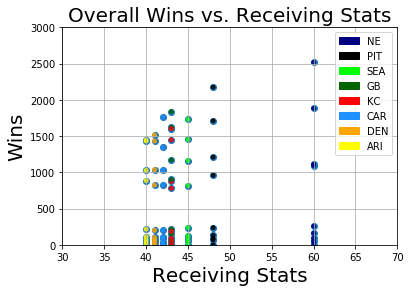

In [244]:
# #First Plot, showing Passes over 20 yards
# #If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()


legend_list = ["NE", "PIT", "SEA", "GB", "KC", "CAR", "DEN", "ARI"]
yplot_Rec = np.array([ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"], 
                      ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], ypRecLng["#RecLng"], 
                      ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], ypRec40["#Rec40Plus"], 
                      ypRecFmb["#RecFumbles"]])
xplot_Rec = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]])
plt.scatter(xplot_Rec, yplot_Rec, marker="o")
x_axis = xplot_Rec
y_axis = yplot_Rec
plt.scatter(x=xplot_Rec, 
            y=yplot_Rec,
            s=15,
            facecolors=colors, 
            alpha=0.8,
            linewidth=1)
# plt.plot()
plt.grid(True)
# colors = ["navy", "black", "lime", "darkgreen", "red", "dodgerblue", "orange", "yellow"]
new_england = mpatches.Patch(color='navy', label='NE')
pit_steelers = mpatches.Patch(color='black', label='PIT')
sea_seahawks = mpatches.Patch(color='lime', label='SEA')
gb_packers = mpatches.Patch(color='darkgreen', label='GB')
kc_chiefs = mpatches.Patch(color='red', label='KC')
car_panthers = mpatches.Patch(color='dodgerblue', label='CAR')
den_broncos = mpatches.Patch(color='orange', label='DEN')
ari_cardinals = mpatches.Patch(color='yellow', label='ARI')

plt.legend(handles=[new_england, pit_steelers, sea_seahawks, gb_packers, 
                    kc_chiefs, car_panthers, den_broncos, ari_cardinals])
plt.title("Overall Wins vs. Receiving Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.xlabel("Receiving Stats", fontsize=20)
# ax = plt.scatter(x=xplot_Rec, y=yplot_Rec, color=colors, label=x1.index);
#Labels and dimensions for plot
plt.ylim(0,3000)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
# plt.legend([rec_list], [legend_list])
# plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])
# lgnd = plt.legend(["NE", "PIT", "SEA", "GB", "KC", "CAR", "DEN", "ARI"], fontsize='small', mode='Expanded', 
#                 numpoints=1, scatterpoints=1,
#                 loc="upper right", title="Teams",
#                 labelspacing=0.5)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# plt.plot(x_axis, y_axis, marker="o", color=colors)

#create ticks on x-axis
# tick_locations = [value + 0.4 for value in xplot_Rec.any()]
# plt.xticks(tick_locations, legend_list)
# tick_locations
plt.show()

# colors = ["navy", "black", "lime", "darkgreen", "red", "dodgerblue", "orange", "yellow"]
# team_names = ["DAL", "DEN", "GB", "SEA", "NE", "DET", "CIN", "PIT"]
# yplot_Rec = np.array([ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"],
#                      ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], ypRecLng["#RecLng"],
#                      ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], ypRec40["#Rec40Plus"],
#                      ypRecFmb["#RecFumbles"]])
# xplot_Rec = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
#                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]])
# plt.scatter(xplot_Rec, yplot_Rec, marker="o", facecolors = colors)
# plt.grid(True)
# plt.legend()
# plt.show()

### Passing Plots

In [189]:
#First Plot, showing Passes over 20 yards
#If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
#_______QB List____________
plt.scatter(x1["#Wins"],
        ypAtt["#PassAttempts"], marker="o")
plt.scatter(x1["#Wins"],
        ypCom["#PassCompletions"], marker="o")
plt.scatter(x1["#Wins"],
        ypPct["#PassPct"], marker="o",)
plt.scatter(x1["#Wins"],
        ypAPG["#PassAttemptsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        ypGY["#PassGrossYards"], marker="o")
plt.scatter(x1["#Wins"],
        ypNY["#PassNetYards"], marker="o")
plt.scatter(x1["#Wins"],
        ypYPA["#PassYardsPerAtt"], marker="o",)
plt.scatter(x1["#Wins"],
        ypYPG["#PassYardsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        ypTD["#PassTD"], marker="o")
plt.scatter(x1["#Wins"],
        ypTDPct["#PassTDPct"], marker="o")
plt.scatter(x1["#Wins"],
        ypInt["#PassInt"], marker="o",)
plt.scatter(x1["#Wins"],
        ypIntPct["#PassIntPct"], marker="o")
plt.scatter(x1["#Wins"],
        ypLng["#PassLng"], marker="o")
plt.scatter(x1["#Wins"],
        ypAvg["#PassAvg"], marker="o")
plt.scatter(x1["#Wins"],
        ypSack["#PassSacks"], marker="o",)
plt.scatter(x1["#Wins"],
        ypSackY["#PassSackY"], marker="o")
plt.scatter(x1["#Wins"],
        yp20["#Pass20Plus"], marker="o")
plt.scatter(x1["#Wins"],
        yp40["#Pass40Plus"], marker="o")
plt.scatter(x1["#Wins"],
        ypQBR["#QBRating"], marker="o")
# _______End QB List____________

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Best NFL Teams", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)

# lgnd = plt.legend(["Attemps", "Completions", "Pass Pct"],fontsize='small', mode='Expanded', 
#                 numpoints=1, scatterpoints=1,
#                 loc="upper right", title="City Types",
#                 labelspacing=0.5)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]

# plt.show()

### Rushing Plots

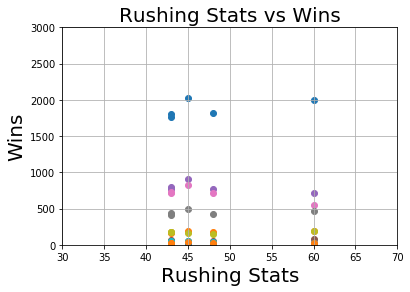

In [100]:
#_______Rush List____________
plt.scatter(x1["#Wins"],
        yRAtt["#RushAttempts"], marker="o",)
plt.scatter(x1["#Wins"],
        yRAPG["#RushAttemptsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        yRYds["#RushYards"], marker="o")
plt.scatter(x1["#Wins"],
        yRAvg["#RushAverage"], marker="o")
plt.scatter(x1["#Wins"],
        yRYPG["#RushYardsPerGame"], marker="o",)
plt.scatter(x1["#Wins"],
        yRTD["#RushTD"], marker="o")
plt.scatter(x1["#Wins"],
        yRLng["#RushLng"], marker="o")
plt.scatter(x1["#Wins"],
        yR1st["#Rush1stDowns"], marker="o")
plt.scatter(x1["#Wins"],
        yR1Pct["#Rush1stDownsPct"], marker="o",)
plt.scatter(x1["#Wins"],
        yR20["#Rush20Plus"], marker="o")
plt.scatter(x1["#Wins"],
        yR40["#Rush40Plus"], marker="o")
plt.scatter(x1["#Wins"],
        yRFmb["#RushFumbles"], marker="o")
#_______End Rush List____________
plt.grid(True)
plt.title("Rushing Stats vs Wins", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Rushing Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Receiving Plots

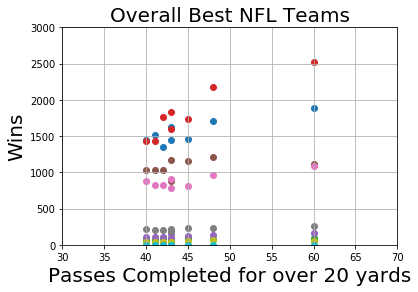

In [8]:
plt.scatter(x1["#Wins"],
        ypRec["#Receptions"], marker="o")
plt.scatter(x1["#Wins"],
        ypReYds["#RecYards"], marker="o")
plt.scatter(x1["#Wins"],
        ypRAvg["#RecAverage"], marker="o")
plt.scatter(x1["#Wins"],
        ypRYPG["#RecYardsPerGame"], marker="o")
plt.scatter(x1["#Wins"],
        ypRecTD["#RecTD"], marker="o",)
plt.scatter(x1["#Wins"],
        ypRecLng["#RecLng"], marker="o")
plt.scatter(x1["#Wins"],
        ypRec1st["#Rec1stDowns"], marker="o")
plt.scatter(x1["#Wins"],
        ypRec20["#Rec20Plus"], marker="o")
plt.scatter(x1["#Wins"],
        ypRec40["#Rec40Plus"], marker="o",)
plt.scatter(x1["#Wins"],
        ypRecFmb["#RecFumbles"], marker="o")

#_______End Rec List____________

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Best NFL Teams", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

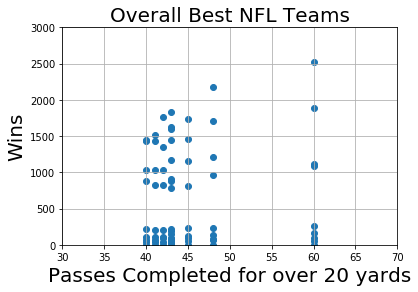

In [7]:
# #_______ Rec List____________
yplot_Rec = np.array([ypRec["#Receptions"], ypReYds["#RecYards"], ypRAvg["#RecAverage"], 
                      ypRYPG["#RecYardsPerGame"], ypRecTD["#RecTD"], ypRecLng["#RecLng"], 
                      ypRec1st["#Rec1stDowns"], ypRec20["#Rec20Plus"], ypRec40["#Rec40Plus"], 
                      ypRecFmb["#RecFumbles"]])
xplot_Rec = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"]])
plt.scatter(xplot_Rec, yplot_Rec, marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec["#Receptions"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypReYds["#RecYards"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRAvg["#RecAverage"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRYPG["#RecYardsPerGame"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRecTD["#RecTD"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypRecLng["#RecLng"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec1st["#Rec1stDowns"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec20["#Rec20Plus"], marker="o")
# plt.scatter(x1["#Wins"],
#         ypRec40["#Rec40Plus"], marker="o",)
# plt.scatter(x1["#Wins"],
#         ypRecFmb["#RecFumbles"], marker="o")

#_______End Rec List____________

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Best NFL Teams", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Passes Completed for over 20 yards", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Scoring Plots

### Turnover Plots

# Defensive Plots

In [9]:
#Passing
# "#TackleSolo", "#TackleTotal", "#TackleAst", "#Sacks", "#SackYds", 
# "#TacklesForLoss", "#Interceptions", "#IntTD", "#IntYds", "#IntAverage", 
# "#IntLng", "#PassesDefended", "#Stuffs", "#Safeties", "#StuffYds",
# "#Fumbles", "#FumLost", "#FumForced", "#FumOwnRec", "#FumOppRec", 
# "#FumRecYds", "#FumTotalRec", "#FumTD"
#_______DEF List____________
ydTSolo = wins["#TackleSolo"]
ydTSolo = pd.DataFrame(ydTSolo)
ydTTot = wins["#TackleTotal"]
ydTTot = pd.DataFrame(ydTTot)
ydTAst = wins["#TackleAst"]
ydTAst = pd.DataFrame(ydTAst)
ydSck = wins["#Sacks"]
ydSck = pd.DataFrame(ydSck)
ydSckYds = wins["#SackYds"]
ydSckYds = pd.DataFrame(ydSckYds)
ydTFL = wins["#TacklesForLoss"]
ydTFL = pd.DataFrame(ydTFL)
ydInt = wins["#Interceptions"]
ydInt = pd.DataFrame(ydInt)
ydIntTD = wins["#IntTD"]
ydIntTD = pd.DataFrame(ydIntTD)
ydIntYds= wins["#IntYds"]
ydIntYds = pd.DataFrame(ydIntYds)
ydIntAvg = wins["#IntAverage"]
ydIntAvg = pd.DataFrame(ydIntAvg)
ydIntLng = wins["#IntLng"]
ydIntLng = pd.DataFrame(ydIntLng)
ydPassDef = wins["#PassesDefended"]
ydPassDef = pd.DataFrame(ydPassDef)
ydStuff = wins["#Stuffs"]
ydStuff = pd.DataFrame(ydStuff)
ydSfty = wins["#Safeties"]
ydSfty = pd.DataFrame(ydSfty)
ydStuffYds = wins["#StuffYds"]
ydStuffYds = pd.DataFrame(ydStuffYds)
ydFmb = wins["#Fumbles"]
ydFmb = pd.DataFrame(ydFmb)
ydFmbLst = wins["#FumLost"]
ydFmbLst = pd.DataFrame(ydFmbLst)
ydFmbFrc = wins["#FumForced"]
ydFmbFrc = pd.DataFrame(ydFmbFrc)
ydFmbRec = wins["#FumOwnRec"]
ydFmbRec = pd.DataFrame(ydFmbRec)
ydFmbOppRec = wins["#FumOppRec"]
ydFmbOppRec = pd.DataFrame(ydFmbOppRec)
ydFmbRecYds = wins["#FumRecYds"]
ydFmbRecYds = pd.DataFrame(ydFmbRecYds)
ydFmbTotRec = wins["#FumTotalRec"]
ydFmbTotRec = pd.DataFrame(ydFmbTotRec)
ydFmbTD = wins["#FumTD"]
ydFmbTD = pd.DataFrame(ydFmbTD)

#_______End DEF List____________

In [24]:
def_list = [ydTSolo["#TackleSolo"],ydTTot["#TackleTotal"],ydTAst["#TackleAst"],ydSck["#Sacks"],
                      ydSckYds["#SackYds"],ydTFL["#TacklesForLoss"],ydInt["#Interceptions"],ydIntTD["#IntTD"],
                      ydIntYds["#IntYds"],ydIntAvg["#IntAverage"],ydIntLng["#IntLng"],ydPassDef["#PassesDefended"],
                      ydStuff["#Stuffs"],ydSfty["#Safeties"],ydStuffYds["#StuffYds"],ydFmb["#Fumbles"],
                      ydFmbLst["#FumLost"],ydFmbFrc["#FumForced"],ydFmbRec["#FumOwnRec"],ydFmbOppRec["#FumOppRec"],
                      ydFmbRecYds["#FumRecYds"],ydFmbTotRec["#FumTotalRec"],ydFmbTD["#FumTD"]]

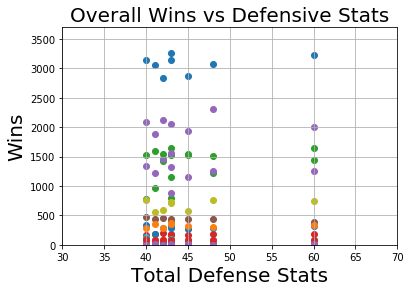

In [128]:
#First Plot, showing Passes over 20 yards
#If not enough colors, use facecolors= np.random.rand(3) in plt.scatter()
plt.scatter(x1["#Wins"],
        ydTSolo["#TackleSolo"], marker="o")
plt.scatter(x1["#Wins"],
        ydTTot["#TackleTotal"], marker="o")
plt.scatter(x1["#Wins"],
        ydTAst["#TackleAst"], marker="o")
plt.scatter(x1["#Wins"],
        ydSck["#Sacks"], marker="o")
plt.scatter(x1["#Wins"],
        ydSckYds["#SackYds"], marker="o",)
plt.scatter(x1["#Wins"],
        ydTFL["#TacklesForLoss"], marker="o")
plt.scatter(x1["#Wins"],
        ydInt["#Interceptions"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntTD["#IntTD"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntYds["#IntYds"], marker="o",)
plt.scatter(x1["#Wins"],
        ydIntAvg["#IntAverage"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntLng["#IntLng"], marker="o")
plt.scatter(x1["#Wins"],
        ydPassDef["#PassesDefended"], marker="o")
plt.scatter(x1["#Wins"],
        ydStuff["#Stuffs"], marker="o",)
plt.scatter(x1["#Wins"],
        ydSfty["#Safeties"], marker="o")
plt.scatter(x1["#Wins"],
        ydStuffYds["#StuffYds"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmb["#Fumbles"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbLst["#FumLost"], marker="o",)
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRec["#FumOwnRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbOppRec["#FumOppRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRecYds["#FumRecYds"], marker="o")
plt.scatter(x1["#Wins"], 
        ydFmbTotRec["#FumTotalRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbTD["#FumTD"], marker="o")
# _______End QB List____________

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Wins vs Defensive Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Total Defense Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

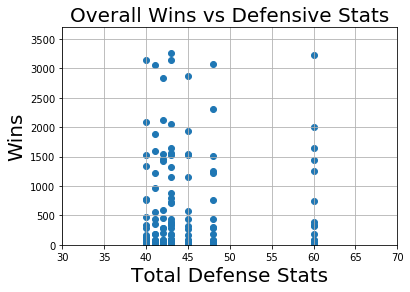

In [31]:
yplot_Def = np.array([ydTSolo["#TackleSolo"],ydTTot["#TackleTotal"],ydTAst["#TackleAst"],ydSck["#Sacks"],
                      ydSckYds["#SackYds"],ydTFL["#TacklesForLoss"],ydInt["#Interceptions"],ydIntTD["#IntTD"],
                      ydIntYds["#IntYds"],ydIntAvg["#IntAverage"],ydIntLng["#IntLng"],ydPassDef["#PassesDefended"],
                      ydStuff["#Stuffs"],ydSfty["#Safeties"],ydStuffYds["#StuffYds"],ydFmb["#Fumbles"],
                      ydFmbLst["#FumLost"],ydFmbFrc["#FumForced"],ydFmbRec["#FumOwnRec"],ydFmbOppRec["#FumOppRec"],
                      ydFmbRecYds["#FumRecYds"],ydFmbTotRec["#FumTotalRec"],ydFmbTD["#FumTD"]])

xplot_Def = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                      x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"],
                      x1["#Wins"], x1["#Wins"], x1["#Wins"]])

plt.scatter(xplot_Def, yplot_Def, marker="o")
plt.grid(True)
plt.title("Overall Wins vs Defensive Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Total Defense Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Pass Def Plots

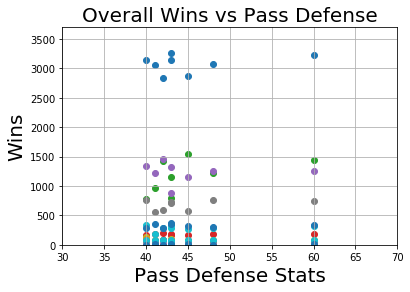

In [127]:
plt.scatter(x1["#Wins"],
        ydTSolo["#TackleSolo"], marker="o")
plt.scatter(x1["#Wins"],
        ydTTot["#TackleTotal"], marker="o")
plt.scatter(x1["#Wins"],
        ydTAst["#TackleAst"], marker="o")
plt.scatter(x1["#Wins"],
        ydSck["#Sacks"], marker="o")
plt.scatter(x1["#Wins"],
        ydSckYds["#SackYds"], marker="o",)

plt.scatter(x1["#Wins"],
        ydInt["#Interceptions"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntTD["#IntTD"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntYds["#IntYds"], marker="o",)
plt.scatter(x1["#Wins"],
        ydIntAvg["#IntAverage"], marker="o")
plt.scatter(x1["#Wins"],
        ydIntLng["#IntLng"], marker="o")
plt.scatter(x1["#Wins"],
        ydPassDef["#PassesDefended"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmb["#Fumbles"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbLst["#FumLost"], marker="o",)
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRec["#FumOwnRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbOppRec["#FumOppRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRecYds["#FumRecYds"], marker="o")
plt.scatter(x1["#Wins"], 
        ydFmbTotRec["#FumTotalRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbTD["#FumTD"], marker="o")
plt.grid(True)
plt.title("Overall Wins vs Pass Defense", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Pass Defense Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Rush Def Plots

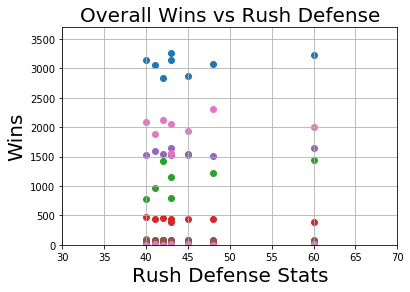

In [126]:
plt.scatter(x1["#Wins"],
        ydTSolo["#TackleSolo"], marker="o")
plt.scatter(x1["#Wins"],
        ydTTot["#TackleTotal"], marker="o")
plt.scatter(x1["#Wins"],
        ydTAst["#TackleAst"], marker="o")
plt.scatter(x1["#Wins"],
        ydTFL["#TacklesForLoss"], marker="o")
plt.scatter(x1["#Wins"],
        ydStuff["#Stuffs"], marker="o",)
plt.scatter(x1["#Wins"],
        ydSfty["#Safeties"], marker="o")
plt.scatter(x1["#Wins"],
        ydStuffYds["#StuffYds"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmb["#Fumbles"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbLst["#FumLost"], marker="o",)
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRec["#FumOwnRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbOppRec["#FumOppRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbFrc["#FumForced"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbRecYds["#FumRecYds"], marker="o")
plt.scatter(x1["#Wins"], 
        ydFmbTotRec["#FumTotalRec"], marker="o")
plt.scatter(x1["#Wins"],
        ydFmbTD["#FumTD"], marker="o")
plt.grid(True)
plt.title("Overall Wins vs Rush Defense", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Rush Defense Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Scoring Def Plots

### Def Turnover Plots

# Special Teams Plots

In [14]:
# "#KB", "#KrRet", "#KrYds", "#KrAvg", "#KrLng","#KrTD", 

ystKB = wins["#KB"]
ystKB = pd.DataFrame(ystKB)
ystKRRet = wins["#KrRet"]
ystKRRet = pd.DataFrame(ystKRRet)
ystKRYds = wins["#KrYds"]
ystKRYds = pd.DataFrame(ystKRYds)
ystKRAvg = wins["#KrAvg"]
ystKRAvg = pd.DataFrame(ystKRAvg)
ystKRLng = wins["#KrLng"]
ystKRLng = pd.DataFrame(ystKRLng)
ystKRTD = wins["#KrTD"]
ystKRTD = pd.DataFrame(ystKRTD)

# "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 

ystKR20P = wins["#Kr20Plus"]
ystKR20P = pd.DataFrame(ystKR20P)
ystKR40P = wins["#Kr40Plus"]
ystKR40P = pd.DataFrame(ystKR40P)
ystKRFC= wins["#KrFC"]
ystKRFC = pd.DataFrame(ystKRFC)
ystKRFum = wins["#KrFum"]
ystKRFum = pd.DataFrame(ystKRFum)
ystPRRet = wins["#PrRet"]
ystPRRet = pd.DataFrame(ystPRRet)

# "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 

ystPRYds = wins["#PrYds"]
ystPRYds = pd.DataFrame(ystPRYds)
ystPRAvg = wins["#PrAvg"]
ystPRAvg = pd.DataFrame(ystPRAvg)
ystPRLng = wins["#PrLng"]
ystPRLng = pd.DataFrame(ystPRLng)
ystPRTD = wins["#PrTD"]
ystPRTD = pd.DataFrame(ystPRTD)
ystPR20P = wins["#Pr20Plus"]
ystPR20P = pd.DataFrame(ystPR20P)

# "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 

ystPR40P = wins["#Pr40Plus"]
ystPR40P = pd.DataFrame(ystPR40P)
ystPRFC = wins["#PrFC"]
ystPRFC = pd.DataFrame(ystPRFC)
yPRFum = wins["#PrFum"]
yPRFum = pd.DataFrame(yPRFum)
ystFGBlk = wins["#FgBlk"]
ystFGBlk = pd.DataFrame(ystFGBlk)
ystFG = wins["#FgMade"]
ystFG = pd.DataFrame(ystFG)

# "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",

ystFGAtt = wins["#FgAtt"]
ystFGAtt = pd.DataFrame(ystFGAtt)
ystFGPct = wins["#FgPct"]
ystFGPct = pd.DataFrame(ystFGPct)
ystFGShort = wins["#FgMade1_19"]
ystFGShort = pd.DataFrame(ystFGShort)
ystFGShortAtt = wins["#FgAtt1_19"]
ystFGShortAtt = pd.DataFrame(ystFGShortAtt)
ystFGShortPct = wins["#Fg1_19Pct"]
ystFGShortPct = pd.DataFrame(ystFGShortPct)

# "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",

ystFG20 = wins["#FgMade20_29"]
ystFG20 = pd.DataFrame(ystFG20)
ystFG20Att = wins["#FgAtt20_29"]
ystFG20Att = pd.DataFrame(ystFG20Att)
ystFG20Pct = wins["#Fg20_29Pct"]
ystFG20Pct = pd.DataFrame(ystFG20Pct)
ystFG30 = wins["#FgMade30_39"]
ystFG30 = pd.DataFrame(ystFG30)
ystFG30Att = wins["#FgAtt30_39"]
ystFG30Att = pd.DataFrame(ystFG30Att)

# "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", 

ystFG30Pct = wins["#Fg30_39Pct"]
ystFG30Pct = pd.DataFrame(ystFG30Pct)
ystFG40 = wins["#FgMade40_49"]
ystFG40 = pd.DataFrame(ystFG40)
ystFG40Att = wins["#FgAtt40_49"]
ystFG40Att = pd.DataFrame(ystFG40Att)
ystFG40Pct = wins["#Fg40_49Pct"]
ystFG40Pct = pd.DataFrame(ystFG40Pct)
ystFG50Pl = wins["#FgMade50Plus"]
ystFG50Pl = pd.DataFrame(ystFG50Pl)

# "#FgAtt50Plus", "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", 

ystFG50PlAtt = wins["#FgAtt50Plus"]
ystFG50PlAtt = pd.DataFrame(ystFG50PlAtt)
ystFG50PlPct = wins["#Fg50PlusPct"]
ystFG50PlPct = pd.DataFrame(ystFG50PlPct)
ystFGLng = wins["#FgLng"]
ystFGLng = pd.DataFrame(ystFGLng)
ystXPBlk = wins["#XpBlk"]
ystXPBlk = pd.DataFrame(ystXPBlk)
ystXPMade = wins["#XpMade"]
ystXPMade = pd.DataFrame(ystXPMade)

# "#XpAtt", "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", 

ystXPAtt = wins["#XpAtt"]
ystXPAtt = pd.DataFrame(ystXPAtt)
ystXPPct = wins["#XpPct"]
ystXPPct = pd.DataFrame(ystXPPct)
ystFGXP = wins["#FgAndXpPts"]
ystFGXP = pd.DataFrame(ystFGXP)
ystKOPct = wins["#KoPct"]
ystKOPct = pd.DataFrame(ystKOPct)
yKO = wins["#Kickoffs"]
yKO = pd.DataFrame(yKO)

# "#KoYds","#KoOOB", '#KoAvg', "#KoTB", "#KoRet", 

ystKOYds = wins["#KoYds"]
ystKOYds = pd.DataFrame(ystKOYds)
ystKOOOB = wins["#KoOOB"]
ystKOOOB = pd.DataFrame(ystKOOOB)
ystKOAvg = wins["#KoAvg"]
ystKOAvg = pd.DataFrame(ystKOAvg)
ystKOTB = wins["#KoTB"]
ystKOTB = pd.DataFrame(ystKOTB)
ystKOR = wins["#KoRet"]
ystKOR = pd.DataFrame(ystKOR)

# "#KoRetYds", "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", 

ystKORYds = wins["#KoRetYds"]
ystKORYds = pd.DataFrame(ystKORYds)
ystKORAvgYds = wins["#KoRetAvgYds"]
ystKORAvgYds = pd.DataFrame(ystKORAvgYds)
ystKOTD = wins["#KoTD"]
ystKOTD = pd.DataFrame(ystKOTD)
ystKOOnSide = wins["#KoOS"]
ystKOOnSide = pd.DataFrame(ystKOOnSide)
ystKOOnSideRec = wins["#KoOSR"]
ystKOOnSideRec = pd.DataFrame(ystKOOnSideRec)

# "#Punts", "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", 

ystP = wins["#Punts"]
ystP = pd.DataFrame(ystP)
ystPYds = wins["#PuntYds"]
ystPYds = pd.DataFrame(ystPYds)
ystPNetYds = wins["#PuntNetYds"]
ystPNetYds = pd.DataFrame(ystPNetYds)
ystPLng = wins["#PuntLng"]
ystPLng = pd.DataFrame(ystPLng)
ystPAvg = wins["#PuntAvg"]
ystPAvg = pd.DataFrame(ystPAvg)

# "#PuntNetAvg", "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", 

ystPNetAvg = wins["#PuntNetAvg"]
ystPNetAvg = pd.DataFrame(ystPNetAvg)
ystPBlk = wins["#PuntBlk"]
ystPBlk = pd.DataFrame(ystPBlk)
ystPOOB = wins["#PuntOOB"]
ystPOOB = pd.DataFrame(ystPOOB)
ystPDown = wins["#PuntDown"]
ystPDown = pd.DataFrame(ystPDown)
ystP20 = wins["#PuntIn20"]
ystP20 = pd.DataFrame(ystP20)

# "#PuntIn20Pct", "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", 

ystP20Pct = wins["#PuntIn20Pct"]
ystP20Pct = pd.DataFrame(ystP20Pct)
ystPTB = wins["#PuntTB"]
ystPTB = pd.DataFrame(ystPTB)
ystPTBPct = wins["#PuntTBPct"]
ystPTBPct = pd.DataFrame(ystPTBPct)
ystPFC = wins["#PuntFC"]
ystPFC = pd.DataFrame(ystPFC)
ystPR = wins["#PuntRet"]
ystPR = pd.DataFrame(ystPR)

# "#PuntRetYds", "#PuntRetAvg"
ystPRYds = wins["#PuntRetYds"]
ystPRYds = pd.DataFrame(ystPRYds)
ystPRAvg = wins["#PuntRetAvg"]
ystPRAvg = pd.DataFrame(ystPRAvg)


In [22]:
#Special Teams Plot Variable List
st_list = [ystKB["#KB"],ystKRRet["#KrRet"],ystKRYds["#KrYds"],ystKRAvg["#KrAvg"], ystKRLng["#KrLng"],ystKRTD["#KrTD"],
         
# "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 
ystKR20P["#Kr20Plus"],ystKR40P["#Kr40Plus"],ystKRFC["#KrFC"],ystKRFum["#KrFum"],ystPRRet["#PrRet"],
                     
# "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 
ystPR40P["#Pr40Plus"],ystPRFC["#PrFC"],yPRFum["#PrFum"],ystFGBlk["#FgBlk"],ystFG["#FgMade"],
                     
# "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",
ystFGAtt["#FgAtt"],ystFGPct["#FgPct"],ystFGShort["#FgMade1_19"],ystFGShortAtt["#FgAtt1_19"],ystFGShortPct["#Fg1_19Pct"],

# "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",
ystFG20["#FgMade20_29"],ystFG20Att["#FgAtt20_29"],ystFG20Pct["#Fg20_29Pct"],ystFG30["#FgMade30_39"],ystFG30Att["#FgAtt30_39"],

# "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", 
ystFG30Pct["#Fg30_39Pct"],ystFG40["#FgMade40_49"],ystFG40Att["#FgAtt40_49"],ystFG40Pct["#Fg40_49Pct"],ystFG50Pl["#FgMade50Plus"],

# "#FgAtt50Plus", "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", 
ystFG50PlAtt["#FgAtt50Plus"],ystFG50PlPct["#Fg50PlusPct"],ystFGLng["#FgLng"],ystXPBlk["#XpBlk"],ystXPMade["#XpMade"],

# "#XpAtt", "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", 
ystXPAtt["#XpAtt"],ystXPPct["#XpPct"],ystFGXP["#FgAndXpPts"],ystKOPct["#KoPct"],yKO["#Kickoffs"],

# "#KoYds","#KoOOB", '#KoAvg', "#KoTB", "#KoRet", 
ystKOYds["#KoYds"],ystKOOOB["#KoOOB"],ystKOAvg["#KoAvg"],ystKOTB["#KoTB"],ystKOR["#KoRet"],

# "#KoRetYds", "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", 
ystKORYds["#KoRetYds"],ystKORAvgYds["#KoRetAvgYds"],ystKOTD["#KoTD"],ystKOOnSide["#KoOS"],ystKOOnSideRec["#KoOSR"],

# "#Punts", "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", 
ystP["#Punts"],ystPYds["#PuntYds"],ystPNetYds["#PuntNetYds"],ystPLng["#PuntLng"],ystPAvg["#PuntAvg"],

# "#PuntNetAvg", "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", 
ystPNetAvg["#PuntNetAvg"],ystPBlk["#PuntBlk"],ystPOOB["#PuntOOB"],ystPDown["#PuntDown"],ystP20["#PuntIn20"],

# "#PuntIn20Pct", "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", 
ystP20Pct["#PuntIn20Pct"],ystPTB["#PuntTB"],ystPTBPct["#PuntTBPct"],ystPFC["#PuntFC"],ystPR["#PuntRet"],

# "#PuntRetYds", "#PuntRetAvg"
# "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 
ystPRLng["#PrLng"],ystPRTD["#PrTD"],ystPR20P["#Pr20Plus"],ystPRYds["#PuntRetYds"],ystPRAvg["#PuntRetAvg"]]

#_______End Special Teams List____________
# ystPRYds["#PrYds"] -duplicates, but have different stats
# ystPRAvg["#PrAvg"] -duplicates, but have different stats

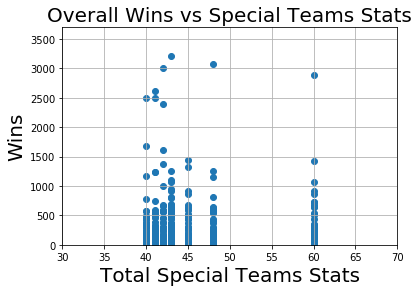

In [23]:
yplot_ST = np.array([ystKB["#KB"],ystKRRet["#KrRet"],ystKRYds["#KrYds"],ystKRAvg["#KrAvg"],
                     ystKRLng["#KrLng"],ystKRTD["#KrTD"],
                     
# "#Kr20Plus", "#Kr40Plus", "#KrFC", "#KrFum", "#PrRet", 
ystKR20P["#Kr20Plus"],ystKR40P["#Kr40Plus"],ystKRFC["#KrFC"],ystKRFum["#KrFum"],ystPRRet["#PrRet"],
                     
# "#Pr40Plus", "#PrFC", "#PrFum", "#FgBlk", "#FgMade", 
ystPR40P["#Pr40Plus"],ystPRFC["#PrFC"],yPRFum["#PrFum"],ystFGBlk["#FgBlk"],ystFG["#FgMade"],
                     
# "#FgAtt","#FgPct", "#FgMade1_19", "#FgAtt1_19", "#Fg1_19Pct",
ystFGAtt["#FgAtt"],ystFGPct["#FgPct"],ystFGShort["#FgMade1_19"],ystFGShortAtt["#FgAtt1_19"],ystFGShortPct["#Fg1_19Pct"],

# "#FgMade20_29", "#FgAtt20_29", "#Fg20_29Pct", "#FgMade30_39", "#FgAtt30_39",
ystFG20["#FgMade20_29"],ystFG20Att["#FgAtt20_29"],ystFG20Pct["#Fg20_29Pct"],ystFG30["#FgMade30_39"],ystFG30Att["#FgAtt30_39"],

# "#Fg30_39Pct","#FgMade40_49", "#FgAtt40_49", "#Fg40_49Pct", "#FgMade50Plus", 
ystFG30Pct["#Fg30_39Pct"],ystFG40["#FgMade40_49"],ystFG40Att["#FgAtt40_49"],ystFG40Pct["#Fg40_49Pct"],ystFG50Pl["#FgMade50Plus"],

# "#FgAtt50Plus", "#Fg50PlusPct", "#FgLng", "#XpBlk", "#XpMade", 
ystFG50PlAtt["#FgAtt50Plus"],ystFG50PlPct["#Fg50PlusPct"],ystFGLng["#FgLng"],ystXPBlk["#XpBlk"],ystXPMade["#XpMade"],

# "#XpAtt", "#XpPct", "#FgAndXpPts", "#KoPct", "#Kickoffs", 
ystXPAtt["#XpAtt"],ystXPPct["#XpPct"],ystFGXP["#FgAndXpPts"],ystKOPct["#KoPct"],yKO["#Kickoffs"],

# "#KoYds","#KoOOB", '#KoAvg', "#KoTB", "#KoRet", 
ystKOYds["#KoYds"],ystKOOOB["#KoOOB"],ystKOAvg["#KoAvg"],ystKOTB["#KoTB"],ystKOR["#KoRet"],

# "#KoRetYds", "#KoRetAvgYds", "#KoTD", "#KoOS", "#KoOSR", 
ystKORYds["#KoRetYds"],ystKORAvgYds["#KoRetAvgYds"],ystKOTD["#KoTD"],ystKOOnSide["#KoOS"],ystKOOnSideRec["#KoOSR"],

# "#Punts", "#PuntYds", "#PuntNetYds", "#PuntLng", "#PuntAvg", 
ystP["#Punts"],ystPYds["#PuntYds"],ystPNetYds["#PuntNetYds"],ystPLng["#PuntLng"],ystPAvg["#PuntAvg"],

# "#PuntNetAvg", "#PuntBlk", "#PuntOOB", "#PuntDown", "#PuntIn20", 
ystPNetAvg["#PuntNetAvg"],ystPBlk["#PuntBlk"],ystPOOB["#PuntOOB"],ystPDown["#PuntDown"],ystP20["#PuntIn20"],

# "#PuntIn20Pct", "#PuntTB", "#PuntTBPct", "#PuntFC", "#PuntRet", 
ystP20Pct["#PuntIn20Pct"],ystPTB["#PuntTB"],ystPTBPct["#PuntTBPct"],ystPFC["#PuntFC"],ystPR["#PuntRet"],

# "#PuntRetYds", "#PuntRetAvg"
# "#PrYds", "#PrAvg", "#PrLng", "#PrTD", "#Pr20Plus", 
ystPRLng["#PrLng"],ystPRTD["#PrTD"],ystPR20P["#Pr20Plus"],ystPRYds["#PuntRetYds"],ystPRAvg["#PuntRetAvg"]])

xplot_ST = np.array([x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], x1["#Wins"], 
                     x1["#Wins"]])

plt.scatter(xplot_ST, yplot_ST, marker="o")
plt.grid(True)
plt.title("Overall Wins vs Special Teams Stats", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3700)
plt.xlabel("Total Special Teams Stats", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### FG Plots

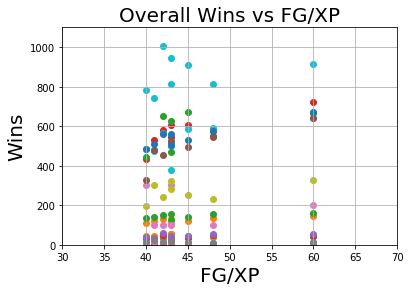

In [187]:
plt.scatter(x1["#Wins"],
        ystFGBlk["#FgBlk"], marker="o",)
plt.scatter(x1["#Wins"],
        ystFG["#FgMade"], marker="o")

plt.scatter(x1["#Wins"],
        ystFGAtt["#FgAtt"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGPct["#FgPct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGShort["#FgMade1_19"], marker="o",)
plt.scatter(x1["#Wins"],
        ystFGShortAtt["#FgAtt1_19"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGShortPct["#Fg1_19Pct"], marker="o")

plt.scatter(x1["#Wins"],
        ystFG20["#FgMade20_29"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG20Att["#FgAtt20_29"], marker="o",)
plt.scatter(x1["#Wins"],
        ystFG20Pct["#Fg20_29Pct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG30["#FgMade30_39"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG30Att["#FgAtt30_39"], marker="o")

plt.scatter(x1["#Wins"],
        ystFG30Pct["#Fg30_39Pct"], marker="o",)
plt.scatter(x1["#Wins"],
        ystFG40["#FgMade40_49"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG40Att["#FgAtt40_49"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG40Pct["#Fg40_49Pct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG50Pl["#FgMade50Plus"], marker="o",)

plt.scatter(x1["#Wins"],
        ystFG50PlAtt["#FgAtt50Plus"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG50PlPct["#Fg50PlusPct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGLng["#FgLng"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGXP["#FgAndXpPts"], marker="o")

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Wins vs FG/XP", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,1100)
plt.xlabel("FG/XP", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### XP Plots

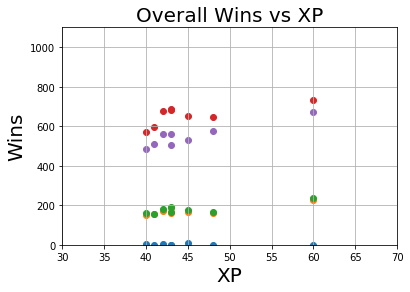

In [184]:
plt.scatter(x1["#Wins"],
        ystXPBlk["#XpBlk"], marker="o",)
plt.scatter(x1["#Wins"],
        ystXPMade["#XpMade"], marker="o")

plt.scatter(x1["#Wins"],
        ystXPAtt["#XpAtt"], marker="o")
plt.scatter(x1["#Wins"],
        ystXPPct["#XpPct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGXP["#FgAndXpPts"], marker="o")

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Wins vs XP", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,1100)
plt.xlabel("XP", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### FG/XP Plots

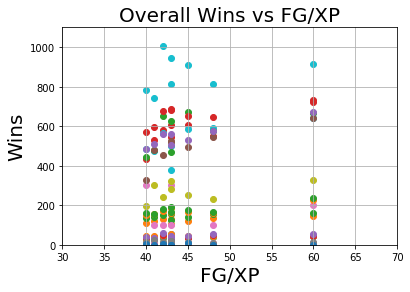

In [182]:
plt.scatter(x1["#Wins"],
        ystFGBlk["#FgBlk"], marker="o",)
plt.scatter(x1["#Wins"],
        ystFG["#FgMade"], marker="o")

plt.scatter(x1["#Wins"],
        ystFGAtt["#FgAtt"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGPct["#FgPct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGShort["#FgMade1_19"], marker="o",)
plt.scatter(x1["#Wins"],
        ystFGShortAtt["#FgAtt1_19"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGShortPct["#Fg1_19Pct"], marker="o")

plt.scatter(x1["#Wins"],
        ystFG20["#FgMade20_29"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG20Att["#FgAtt20_29"], marker="o",)
plt.scatter(x1["#Wins"],
        ystFG20Pct["#Fg20_29Pct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG30["#FgMade30_39"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG30Att["#FgAtt30_39"], marker="o")

plt.scatter(x1["#Wins"],
        ystFG30Pct["#Fg30_39Pct"], marker="o",)
plt.scatter(x1["#Wins"],
        ystFG40["#FgMade40_49"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG40Att["#FgAtt40_49"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG40Pct["#Fg40_49Pct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG50Pl["#FgMade50Plus"], marker="o",)

plt.scatter(x1["#Wins"],
        ystFG50PlAtt["#FgAtt50Plus"], marker="o")
plt.scatter(x1["#Wins"],
        ystFG50PlPct["#Fg50PlusPct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGLng["#FgLng"], marker="o")
plt.scatter(x1["#Wins"],
        ystXPBlk["#XpBlk"], marker="o",)
plt.scatter(x1["#Wins"],
        ystXPMade["#XpMade"], marker="o")

plt.scatter(x1["#Wins"],
        ystXPAtt["#XpAtt"], marker="o")
plt.scatter(x1["#Wins"],
        ystXPPct["#XpPct"], marker="o")
plt.scatter(x1["#Wins"],
        ystFGXP["#FgAndXpPts"], marker="o")

#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Wins vs FG/XP", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,1100)
plt.xlabel("FG/XP", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Punt Plots

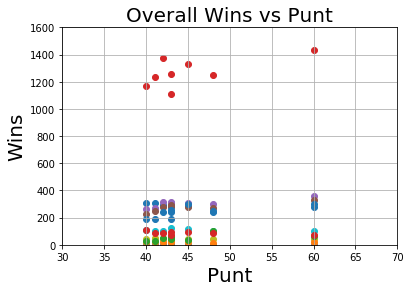

In [149]:
plt.scatter(x1["#Wins"],
        ystP["#Punts"], marker="o")
plt.scatter(x1["#Wins"],
        ystPYds["#PuntYds"], marker="o")
plt.scatter(x1["#Wins"],
        ystPNetYds["#PuntNetYds"], marker="o")
plt.scatter(x1["#Wins"],
        ystPLng["#PuntLng"], marker="o",)
plt.scatter(x1["#Wins"],
        ystPAvg["#PuntAvg"], marker="o")

plt.scatter(x1["#Wins"],
        ystPNetAvg["#PuntNetAvg"], marker="o")
plt.scatter(x1["#Wins"],
        ystPBlk["#PuntBlk"], marker="o")
plt.scatter(x1["#Wins"],
        ystPOOB["#PuntOOB"], marker="o")
plt.scatter(x1["#Wins"],
        ystPDown["#PuntDown"], marker="o",)
plt.scatter(x1["#Wins"],
        ystP20["#PuntIn20"], marker="o")

plt.scatter(x1["#Wins"],
        ystP20Pct["#PuntIn20Pct"], marker="o")
plt.scatter(x1["#Wins"],
        ystPTB["#PuntTB"], marker="o")
plt.scatter(x1["#Wins"],
        ystPTBPct["#PuntTBPct"], marker="o")
plt.scatter(x1["#Wins"],
        ystPFC["#PuntFC"], marker="o",)
#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Wins vs Punt", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,1600)
plt.xlabel("Punt", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### Kickoff Plots

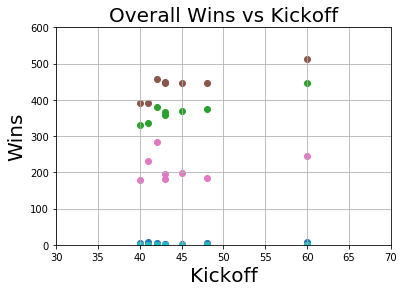

In [146]:
plt.scatter(x1["#Wins"],
        ystKB["#KB"], marker="o")

plt.scatter(x1["#Wins"],
        ystKOPct["#KoPct"], marker="o",)
plt.scatter(x1["#Wins"],
        yKO["#Kickoffs"], marker="o")

plt.scatter(x1["#Wins"],
        ystKOYds["#KoYds"], marker="o")
plt.scatter(x1["#Wins"],
        ystKOOOB["#KoOOB"], marker="o")
plt.scatter(x1["#Wins"],
        ystKOAvg["#KoAvg"], marker="o")
plt.scatter(x1["#Wins"],
        ystKOTB["#KoTB"], marker="o",)

plt.scatter(x1["#Wins"],
        ystKOTD["#KoTD"], marker="o")
plt.scatter(x1["#Wins"],
        ystKOOnSide["#KoOS"], marker="o",)
plt.scatter(x1["#Wins"],
        ystKOOnSideRec["#KoOSR"], marker="o")
#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Wins vs Kickoff", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,600)
plt.xlabel("Kickoff", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### PR Plots

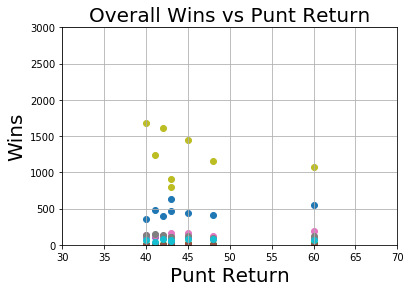

In [180]:
#Having Issues with PrYds and PrAvg, won't print, they run as duplicates with PuntRetYds and PuntRetAvg, 
#but when pulling up stats, they are not the same!

# plt.scatter(x1["#Wins"],
#         ystPRYds["#PrYds"], marker="o")
# plt.scatter(x1["#Wins"],
#         ystPRAvg["#PrAvg"], marker="o",)
plt.scatter(x1["#Wins"],
        ystPRLng["#PrLng"], marker="o")
plt.scatter(x1["#Wins"],
        ystPRTD["#PrTD"], marker="o")
plt.scatter(x1["#Wins"],
        ystPR20P["#Pr20Plus"], marker="o")

plt.scatter(x1["#Wins"],
        ystPR40P["#Pr40Plus"], marker="o",)
plt.scatter(x1["#Wins"],
        ystPRFC["#PrFC"], marker="o")
plt.scatter(x1["#Wins"],
        yPRFum["#PrFum"], marker="o")

plt.scatter(x1["#Wins"],
        ystPRRet["#PrRet"], marker="o")


plt.scatter(x1["#Wins"],
        ystPR["#PuntRet"], marker="o")
plt.scatter(x1["#Wins"],
        ystPRYds["#PuntRetYds"], marker="o")
plt.scatter(x1["#Wins"],
        ystPRAvg["#PuntRetAvg"], marker="o")
#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Wins vs Punt Return", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,3000)
plt.xlabel("Punt Return", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()

### KOR Plots

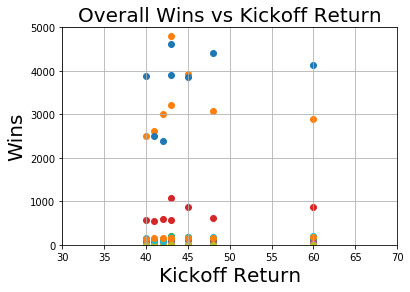

In [181]:
plt.scatter(x1["#Wins"],
        ystKRRet["#KrRet"], marker="o")
plt.scatter(x1["#Wins"],
        ystKRYds["#KrYds"], marker="o")
plt.scatter(x1["#Wins"],
        ystKRAvg["#KrAvg"], marker="o")
plt.scatter(x1["#Wins"],
        ystKRLng["#KrLng"], marker="o",)
plt.scatter(x1["#Wins"],
        ystKRTD["#KrTD"], marker="o")

plt.scatter(x1["#Wins"],
        ystKR20P["#Kr20Plus"], marker="o")
plt.scatter(x1["#Wins"],
        ystKR40P["#Kr40Plus"], marker="o")
plt.scatter(x1["#Wins"],
        ystKRFC["#KrFC"], marker="o",)
plt.scatter(x1["#Wins"],
        ystKRFum["#KrFum"], marker="o")
plt.scatter(x1["#Wins"],
        ystKOR["#KoRet"], marker="o")

plt.scatter(x1["#Wins"],
        ystKORYds["#KoRetYds"], marker="o")
plt.scatter(x1["#Wins"],
        ystKORAvgYds["#KoRetAvgYds"], marker="o")
#Labels and dimensions for plot
plt.grid(True)
plt.title("Overall Wins vs Kickoff Return", fontsize=20)
plt.ylabel("Wins", fontsize=20)
plt.ylim(0,5000)
plt.xlabel("Kickoff Return", fontsize=20)
plt.xlim(30,70)
plt.figure(figsize=(10,10), dpi=80)
plt.show()